In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Student Mental health.csv")
df.head()

,Jenis Kelamin,Umur,Jurusan,Tahun Studi,IPK,Sudah Menikah?,Sedang Depresi?,Sedang Cemas?,Sedang Panik?,Sedang Menjalani Perawatan?
0,Perempuan,18,Teknik Mesin,1,"3,00 - 3,49",Tidak,Ya,Tidak,Ya,Tidak
1,Pria,21,Pendidikan Agama Islam,2,"3,00 - 3,49",Tidak,Tidak,Ya,Tidak,Tidak
2,Pria,19,Teknik Mesin,1,"3,00 - 3,49",Tidak,Tidak,Tidak,Tidak,Tidak
3,Perempuan,22,Hukum,3,"3,00 - 3,49",Ya,Ya,Tidak,Tidak,Tidak
4,Pria,23,Matematika,4,"3,00 - 3,49",Tidak,Tidak,Tidak,Tidak,Tidak


In [3]:
print(df.shape)

(500, 10)


In [4]:
df.columns

Index(['Jenis Kelamin', 'Umur', 'Jurusan', 'Tahun Studi', 'IPK',
       'Sudah Menikah?', 'Sedang Depresi?', 'Sedang Cemas?', 'Sedang Panik?',
       'Sedang Menjalani Perawatan?'],
      dtype='object')

In [5]:
df.describe()

,Umur,Tahun Studi
count,500.000000,500.000000
mean,20.466000,2.308000
std,2.001213,1.250706
min,18.000000,1.000000
25%,19.000000,1.000000
50%,20.000000,2.000000
75%,22.000000,3.000000
max,24.000000,6.000000


In [6]:
# age column is strange, look for outliers
df['Umur'].value_counts()

Umur
20    111
19    107
18     88
24     66
21     50
23     46
22     32
Name: count, dtype: int64

## Data Cleaning

In [7]:
df=df.drop_duplicates()

In [8]:
df.isnull().sum()

Jenis Kelamin                  0
Umur                           0
Jurusan                        0
Tahun Studi                    0
IPK                            0
Sudah Menikah?                 0
Sedang Depresi?                0
Sedang Cemas?                  0
Sedang Panik?                  0
Sedang Menjalani Perawatan?    0
dtype: int64

Kami melihat satu baris memiliki nilai yang hilang sehingga solusi termudah adalah dengan menghilangkan baris tersebut seluruhnya

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Jenis Kelamin                  0
Umur                           0
Jurusan                        0
Tahun Studi                    0
IPK                            0
Sudah Menikah?                 0
Sedang Depresi?                0
Sedang Cemas?                  0
Sedang Panik?                  0
Sedang Menjalani Perawatan?    0
dtype: int64

In [10]:
columns_names = ['Jenis Kelamin', 'Umur', 'Jurusan', 'Tahun Studi', 'IPK',
       'Sudah Menikah?', 'Sedang Depresi?', 'Sedang Cemas?', 'Sedang Panik?',
       'Sedang Menjalani Perawatan?']
df.columns = columns_names
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Jenis Kelamin                161 non-null    object
 1   Umur                         161 non-null    int64 
 2   Jurusan                      161 non-null    object
 3   Tahun Studi                  161 non-null    int64 
 4   IPK                          161 non-null    object
 5   Sudah Menikah?               161 non-null    object
 6   Sedang Depresi?              161 non-null    object
 7   Sedang Cemas?                161 non-null    object
 8   Sedang Panik?                161 non-null    object
 9   Sedang Menjalani Perawatan?  161 non-null    object
dtypes: int64(2), object(8)
memory usage: 13.8+ KB


Penamaan setiap kolom terlalu panjang sehingga lebih mudah untuk mengganti nama menjadi nama yang lebih pendek dan deskriptif

**Umur**

In [11]:
df['Umur'].dtype
# dtype('float64')
df['Umur'] = df['Umur'].astype(int)
df['Umur'].dtype

dtype('int32')

**Tahun Studi**

In [12]:
df['Tahun Studi'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

Kami menemukan metode terbaik bagi kami adalah mengubah kolom Tahun Studi menjadi tipe integer yang hanya berisi Tahun

**Kolom IPK**

In [13]:
df['IPK'].unique()

array(['3,00 - 3,49', '3,50 - 4,00', '2,50 - 2,99', '2,00 - 2,49',
       '0 - 1,99'], dtype=object)

Menghapus nilai-nilai berbeda yang disebabkan oleh spasi putih

**Students Conditions**

In [14]:
depressed_filter = df['Sedang Depresi?'] == 'Ya'
anxiety_filter = df['Sedang Cemas?'] == 'Ya'
panicking_filter = df['Sedang Panik?'] == 'Ya'
conditions_filter = anxiety_filter | depressed_filter | panicking_filter
no_conditions_filter = ~depressed_filter & ~anxiety_filter & ~panicking_filter

Setelah membuat beberapa filter, saya menambahkan kolom baru bernama Has Condition? untuk menunjukkan apakah seorang Siswa terpengaruh atau tidak oleh suatu kondisi.

In [15]:
df['Memiliki Kondisi?'] = np.where(conditions_filter, 'Ya',"Tidak")
df

,Jenis Kelamin,Umur,Jurusan,Tahun Studi,IPK,Sudah Menikah?,Sedang Depresi?,Sedang Cemas?,Sedang Panik?,Sedang Menjalani Perawatan?,Memiliki Kondisi?
0,Perempuan,18,Teknik Mesin,1,"3,00 - 3,49",Tidak,Ya,Tidak,Ya,Tidak,Ya
1,Pria,21,Pendidikan Agama Islam,2,"3,00 - 3,49",Tidak,Tidak,Ya,Tidak,Tidak,Ya
2,Pria,19,Teknik Mesin,1,"3,00 - 3,49",Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,Perempuan,22,Hukum,3,"3,00 - 3,49",Ya,Ya,Tidak,Tidak,Tidak,Ya
4,Pria,23,Matematika,4,"3,00 - 3,49",Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...
218,Perempuan,18,Hukum,1,"3,50 - 4,00",Tidak,Tidak,Ya,Ya,Ya,Ya
219,Perempuan,18,Matematika,1,"2,50 - 2,99",Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
220,Perempuan,21,Ilmu Komputer,3,"3,00 - 3,49",Tidak,Ya,Tidak,Ya,Ya,Ya
221,Perempuan,20,Manajemen,2,"3,00 - 3,49",Ya,Ya,Tidak,Tidak,Tidak,Ya


Membuat kolom baru bernama Kondisi.

Untuk setiap kondisi (Mengalami Depresi, Mengalami Kecemasan, atau Mengalami Serangan Panik) yang dialami siswa, sebuah huruf (A = Kecemasan, D = Depresi, dan P = Serangan Panik) ditambahkan ke kolom Kondisi sehingga memudahkan untuk melacak dan memfilter data.

In [16]:
df['Kondisi'] = ''
df.loc[anxiety_filter, 'Kondisi'] += 'A'
df.loc[depressed_filter, 'Kondisi'] += 'D'
df.loc[panicking_filter, 'Kondisi'] += 'P'
df.loc[no_conditions_filter, 'Kondisi'] += 'None'
# df['Condition'].unique()

df

,Jenis Kelamin,Umur,Jurusan,Tahun Studi,IPK,Sudah Menikah?,Sedang Depresi?,Sedang Cemas?,Sedang Panik?,Sedang Menjalani Perawatan?,Memiliki Kondisi?,Kondisi
0,Perempuan,18,Teknik Mesin,1,"3,00 - 3,49",Tidak,Ya,Tidak,Ya,Tidak,Ya,DP
1,Pria,21,Pendidikan Agama Islam,2,"3,00 - 3,49",Tidak,Tidak,Ya,Tidak,Tidak,Ya,A
2,Pria,19,Teknik Mesin,1,"3,00 - 3,49",Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,None
3,Perempuan,22,Hukum,3,"3,00 - 3,49",Ya,Ya,Tidak,Tidak,Tidak,Ya,D
4,Pria,23,Matematika,4,"3,00 - 3,49",Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,None
...,...,...,...,...,...,...,...,...,...,...,...,...
218,Perempuan,18,Hukum,1,"3,50 - 4,00",Tidak,Tidak,Ya,Ya,Ya,Ya,AP
219,Perempuan,18,Matematika,1,"2,50 - 2,99",Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,None
220,Perempuan,21,Ilmu Komputer,3,"3,00 - 3,49",Tidak,Ya,Tidak,Ya,Ya,Ya,DP
221,Perempuan,20,Manajemen,2,"3,00 - 3,49",Ya,Ya,Tidak,Tidak,Tidak,Ya,D


## Data Visualization

Distribusi Gender - Visualisasikan distribusi gender di kalangan siswa

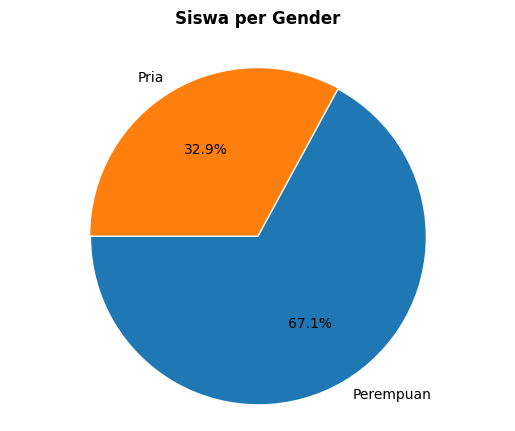

In [17]:
labels = df['Jenis Kelamin'].value_counts().index

plt.pie(df['Jenis Kelamin'].value_counts(),labels=labels, autopct='%1.1f%%',startangle=180, explode=(0.005,0.005))
plt.axis('equal')
plt.title('Siswa per Gender', fontsize=12, fontweight='bold', pad=20)
plt.show()

Siswa berdasarkan Tahun Studi

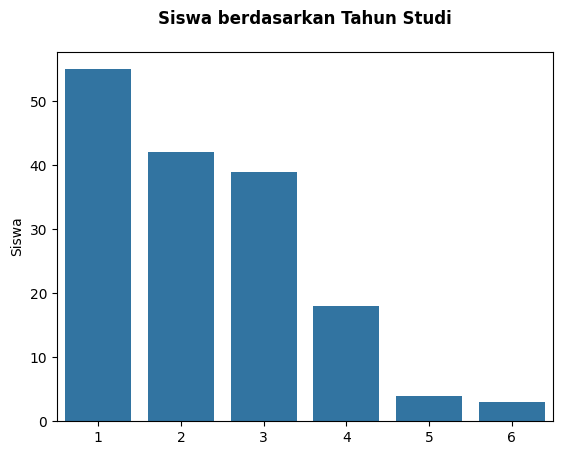

In [18]:
sns.countplot(data=df, x='Tahun Studi').set(xlabel=None, ylabel='Siswa')
plt.title('Siswa berdasarkan Tahun Studi', fontsize=12, fontweight='bold', pad=20)
sns.color_palette("pastel")

plt.show()

Siswa menurut IPK

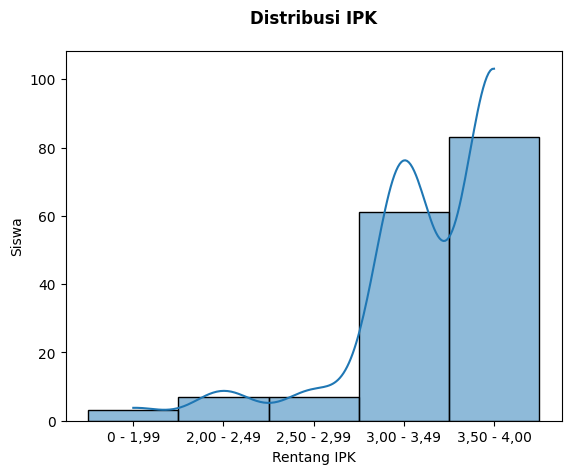

In [19]:
sns.histplot(df['IPK'].sort_values(), kde=True)
plt.xlabel('Rentang IPK')
plt.ylabel('Siswa')
plt.title('Distribusi IPK', fontsize=12, fontweight='bold', pad=20)
plt.show()

Siswa berdasarkan Usia

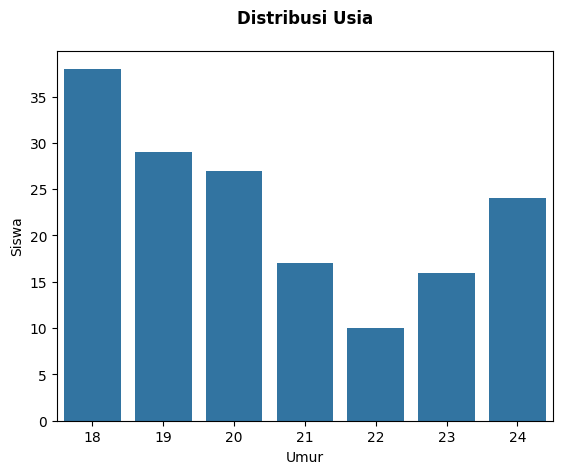

In [20]:
sns.countplot(data=df, x='Umur')
plt.xlabel('Umur')
plt.ylabel('Siswa')
plt.title('Distribusi Usia', fontsize=12, fontweight='bold', pad=20)

plt.show()

Analisis Awal

Dalam analisis awal tentang struktur dasar kumpulan data ini, kami telah memperhatikan lima pengamatan utama:

1. Distribusi nilai tertinggi adalah pada Umur 18, dengan nilai sekitar 35.
Nilai distribusi menurun secara signifikan setelah Umur 18, mencapai nilai sekitar 30 pada Umur 19.
2. Nilai distribusi terus menurun hingga mencapai nilai sekitar 20 pada Umur 21.
3. Setelah Umur 21, nilai distribusi mulai fluktuatif, mencapai sekitar 15 pada Umur 22, lalu naik lagi ke sekitar 20 pada Umur 23.
4. Pada Umur 24, nilai distribusi berada di sekitar 25, menunjukkan peningkatan dari Umur 23.

Secara umum, grafik ini menunjukkan pola distribusi nilai yang menurun tajam setelah usia 18 tahun, lalu berfluktuasi pada usia-usia selanjutnya.

**Exploratory Data Analysis**

In [21]:
df_condition = df[df['Memiliki Kondisi?'] == 'Ya']

Menemukan kondisi yang paling umum

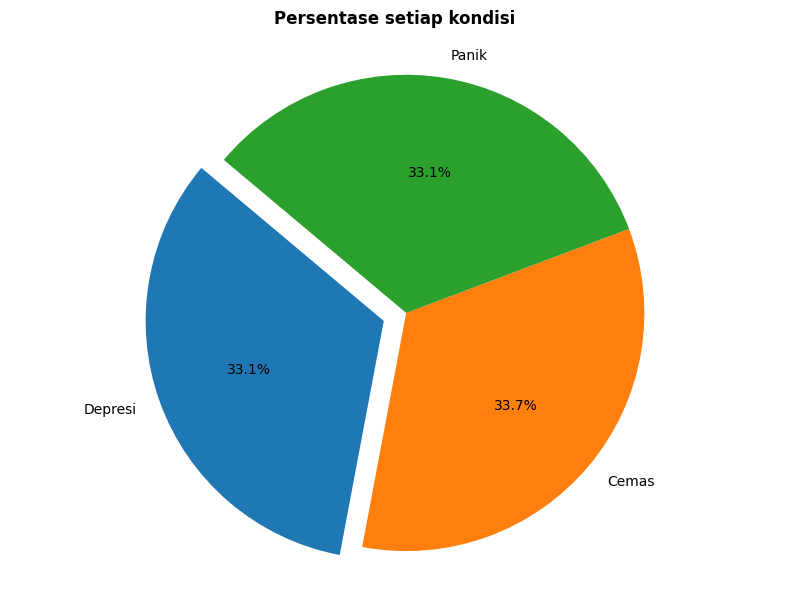

In [22]:
total_entries = len(df_condition)
persentase_depresi = (df_condition['Sedang Depresi?'].value_counts()['Ya'] / total_entries) * 100
persentase_cemas = (df_condition['Sedang Cemas?'].value_counts()['Ya'] / total_entries) * 100
persentase_panik = (df_condition['Sedang Panik?'].value_counts()['Ya'] / total_entries) * 100

# Create a pie chart
labels = ['Depresi', 'Cemas', 'Panik']
sizes = [persentase_depresi, persentase_cemas, persentase_panik]

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=(0.1, 0, 0), labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Persentase setiap kondisi', fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Berapa banyak orang dengan kondisi tertentu yang menjalani perawatan?

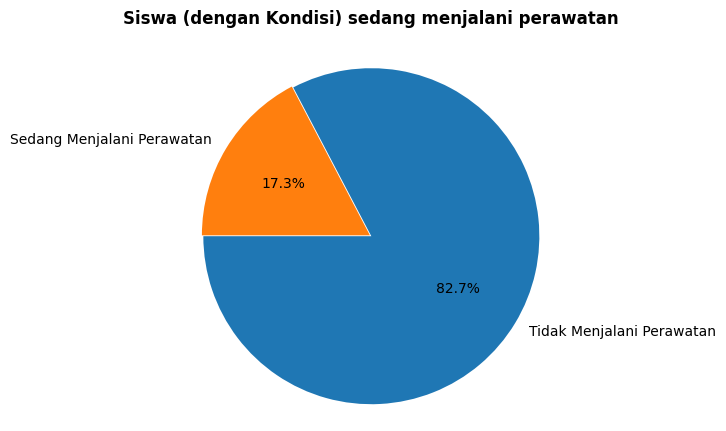

In [23]:
labels = ['Tidak Menjalani Perawatan', 'Sedang Menjalani Perawatan']
plt.pie(df_condition['Sedang Menjalani Perawatan?'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=180, explode=(0.005, 0.005))
plt.axis('equal')
plt.title('Siswa (dengan Kondisi) sedang menjalani perawatan', fontsize=12, fontweight='bold', pad=20)
plt.show()

In [24]:
sorted_conditions = df_condition['Kondisi'].value_counts().index.tolist()

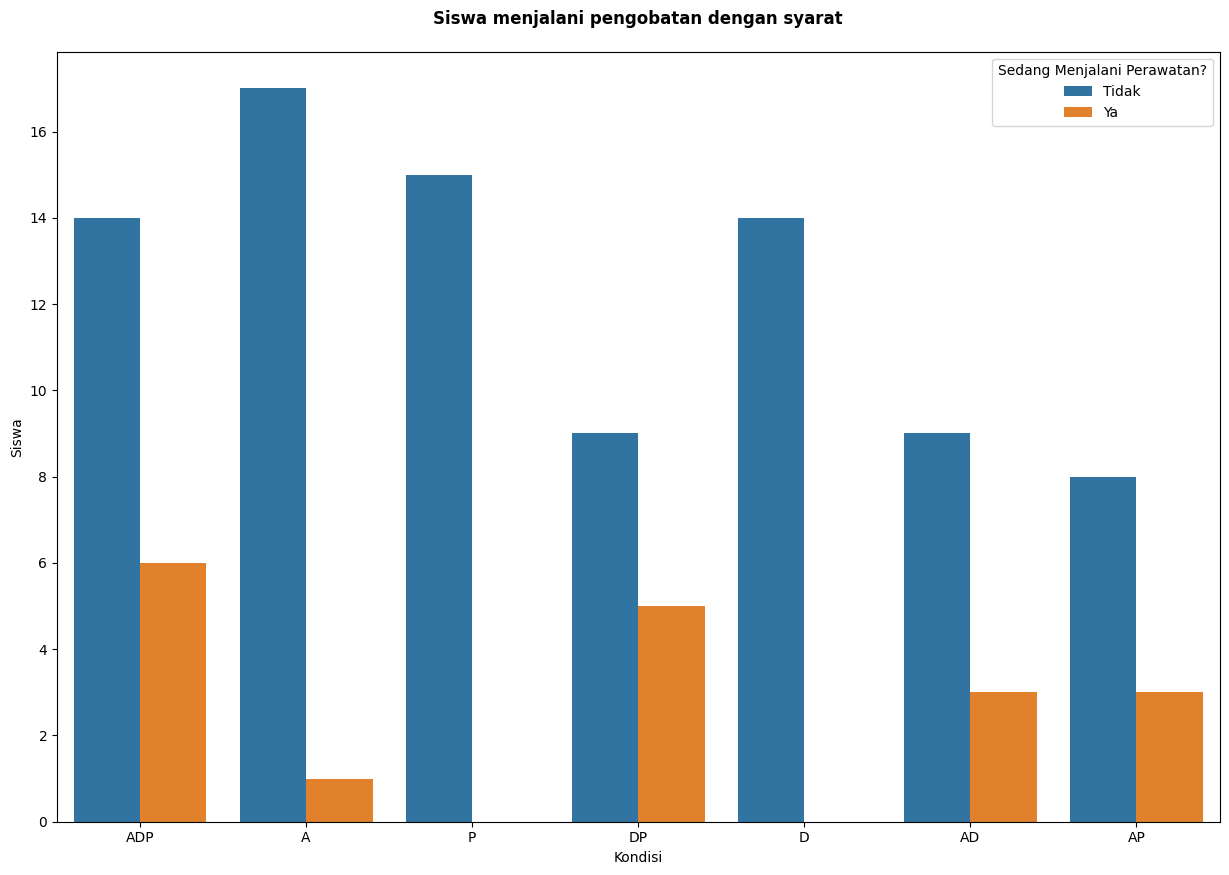

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_condition, x='Kondisi', hue='Sedang Menjalani Perawatan?', order=sorted_conditions)

plt.xlabel('Kondisi')
plt.ylabel('Siswa')
plt.title('Siswa menjalani pengobatan dengan syarat', fontsize=12, fontweight='bold', pad=20)
plt.show()

Berdasarkan grafik, dapat disimpulkan bahwa kondisi 'D' (yang diduga terkait depresi) memiliki jumlah siswa terkecil yang sedang menjalani pengobatan, hanya sekitar 10 siswa, sedangkan kondisi 'AP' (diduga terkait gangguan perhatian/hiperaktif) memiliki jumlah siswa terbanyak yang sedang menjalani pengobatan, yaitu sekitar 12 siswa. Secara keseluruhan, grafik menunjukkan variasi jumlah siswa yang sedang menjalani pengobatan untuk berbagai kondisi, berkisar antara 10-16 siswa per kondisi.

**Conditions By Gender**

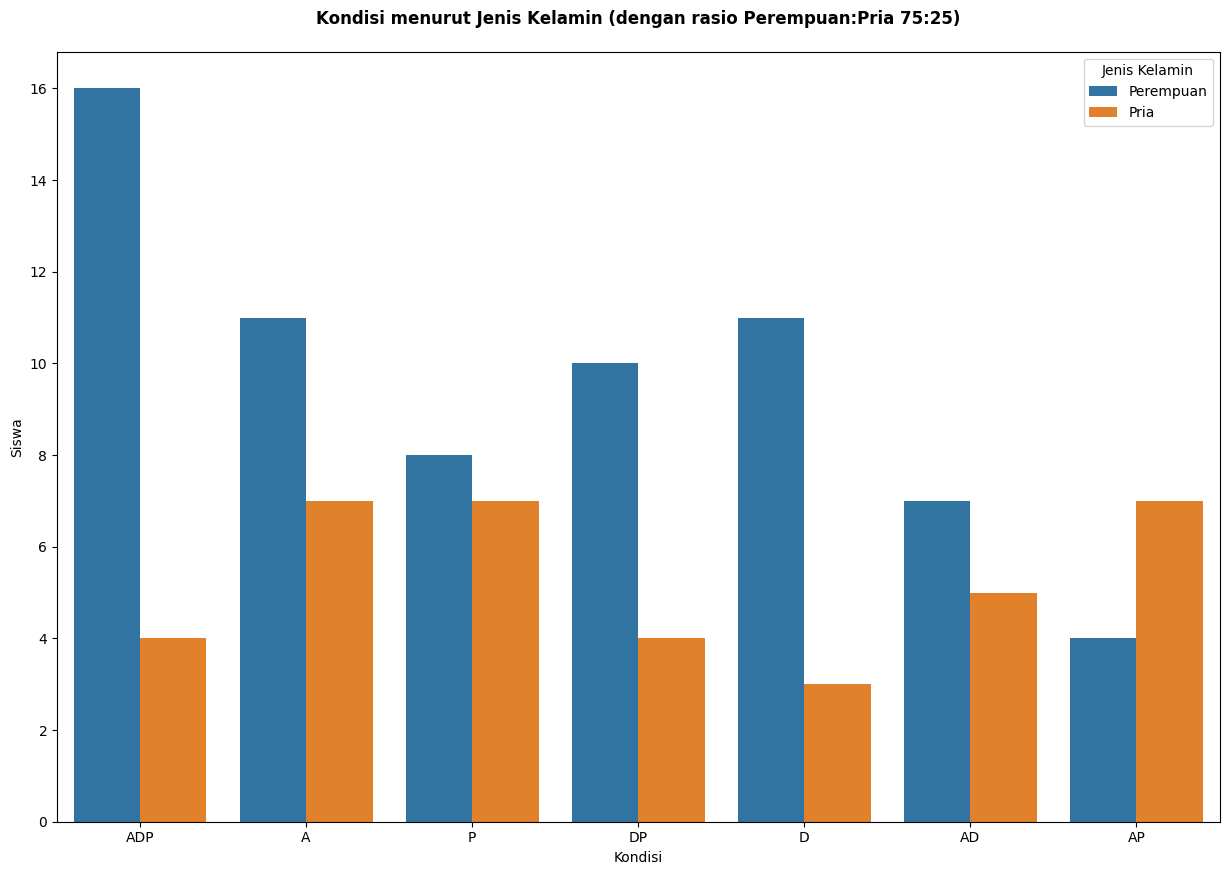

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_condition, x='Kondisi', hue='Jenis Kelamin', order=sorted_conditions)

plt.xlabel('Kondisi')
plt.ylabel('Siswa')
plt.title('Kondisi menurut Jenis Kelamin (dengan rasio Perempuan:Pria 75:25)', fontsize=12, fontweight='bold', pad=20)
plt.show()

In [27]:
# Menghitung rasio gender
gender_ratio = df_condition['Jenis Kelamin'].value_counts(normalize=True)

# Menghitung jumlah kondisi berdasarkan gender
grouped = df_condition.groupby(['Kondisi', 'Jenis Kelamin']).size().reset_index(name='Count')
grouped = grouped.merge(gender_ratio.rename('Gender Ratio'), left_on='Jenis Kelamin', right_index=True)

# Normalisasi jumlah kondisi berdasarkan rasio gender
grouped['Count'] = grouped['Count'] / grouped['Gender Ratio']

# Pivot data untuk membuat dataframe dengan kondisi sebagai baris dan gender sebagai kolom
condition_gender_df = grouped.pivot(index='Kondisi', columns='Jenis Kelamin', values='Count').reset_index()
condition_gender_df.fillna(0, inplace=True)
condition_gender_df.columns = ['Kondisi', 'Pria', 'Perempuan']

# Menambahkan kolom total
condition_gender_df['Total'] = condition_gender_df['Pria'] + condition_gender_df['Perempuan']

# Menyortir dataframe berdasarkan total
condition_gender_df = condition_gender_df.round(2).sort_values('Total', ascending=False)

print(condition_gender_df)

  Kondisi   Pria  Perempuan  Total
0       A  17.07      19.68  36.75
2     ADP  24.84      11.24  36.08
6       P  12.42      19.68  32.09
5      DP  15.52      11.24  26.77
3      AP   6.21      19.68  25.88
4       D  17.07       8.43  25.51
1      AD  10.87      14.05  24.92


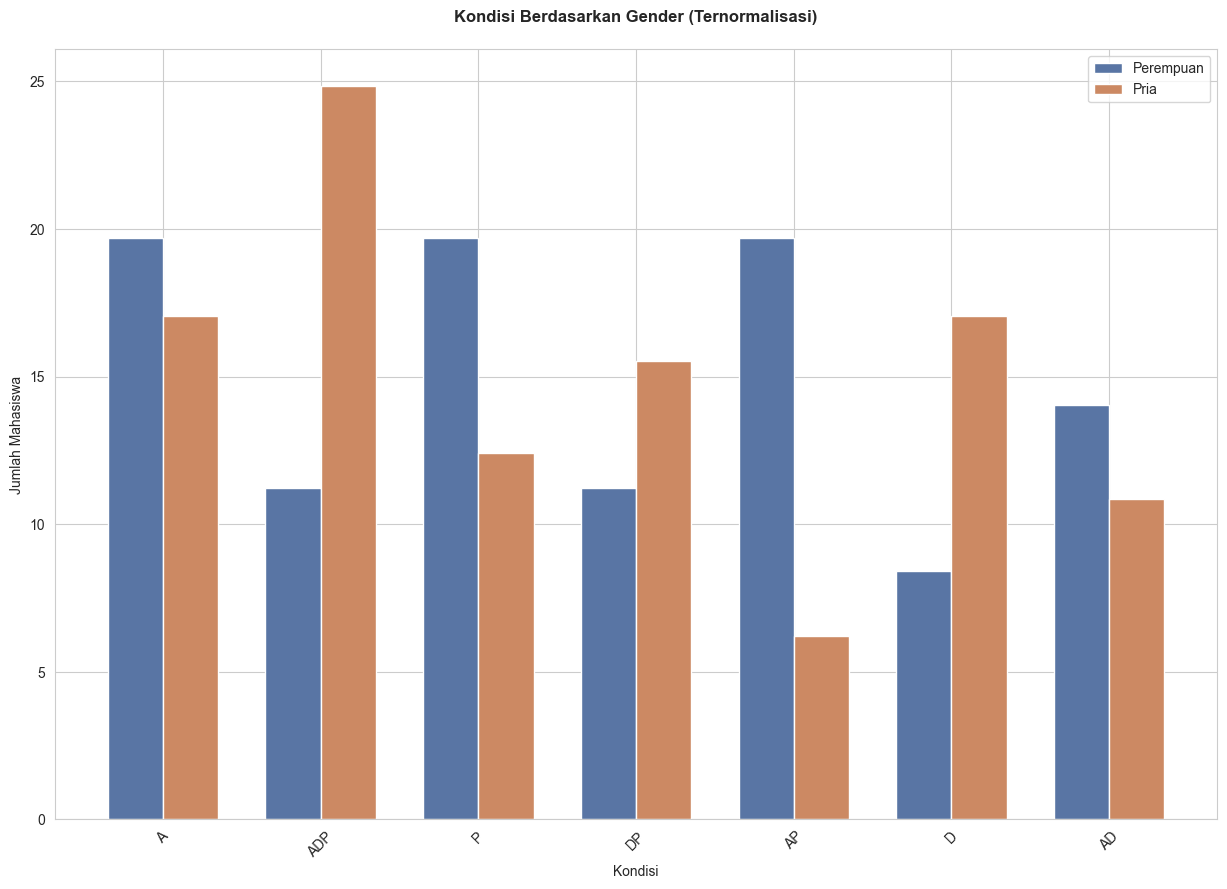

In [28]:
plt.figure(figsize=(15,10))
bar_width = 0.35

condition_indices = np.arange(len(condition_gender_df))

sns.set_style("whitegrid")

plt.bar(condition_indices, condition_gender_df['Perempuan'], width=bar_width, color='#5975a4', label='Perempuan')
plt.bar(condition_indices + bar_width, condition_gender_df['Pria'], width=bar_width, color='#cc8963', label='Pria')

plt.xticks(condition_indices + bar_width / 2, condition_gender_df['Kondisi'], rotation=45)

plt.xlabel('Kondisi')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Kondisi Berdasarkan Gender (Ternormalisasi)', fontsize=12, fontweight='bold', pad=20)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Berdasarkan grafik "Kondisi Berdasarkan Gender (Ternormalisasi)", dapat dilihat beberapa hal:

1. Untuk kondisi 'ADP', perempuan memiliki nilai yang lebih tinggi dibandingkan pria.
2. Untuk kondisi 'A', perempuan juga memiliki nilai yang lebih tinggi daripada pria.
3. Pada kondisi 'P', nilai untuk perempuan dan pria terlihat sangat kontras, dimana perempuan memiliki nilai yang jauh lebih tinggi.
4. Pada kondisi 'DP', nilai perempuan kembali lebih tinggi daripada pria.
5. Untuk kondisi 'D', nilai perempuan dan pria relatif seimbang.
6. Pada kondisi 'AD', nilai perempuan lebih tinggi dibandingkan pria.
7. Untuk kondisi 'AP', terdapat perbedaan yang cukup besar antara nilai perempuan dan pria, dimana perempuan memiliki nilai yang lebih tinggi.

Secara umum, grafik ini menunjukkan bahwa perempuan cenderung memiliki nilai yang lebih tinggi pada berbagai kondisi dibandingkan pria, kecuali pada kondisi 'D' yang relatif seimbang.

## Data Processing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = './Dataset/stress_dataset.csv'
df = pd.read_csv(file_path)

In [5]:
# Menampilkan beberapa baris pertama dari dataset
print("Data sebelum preprocessing:")
print(df.head())

Data sebelum preprocessing:
  Jenis Kelamin  Umur                 Jurusan  Tahun Studi          IPK  \
0     Perempuan    18            Teknik Mesin            1  3,00 - 3,49   
1          Pria    21  Pendidikan Agama Islam            2  3,00 - 3,49   
2          Pria    19            Teknik Mesin            1  3,00 - 3,49   
3     Perempuan    22                   Hukum            3  3,00 - 3,49   
4          Pria    23              Matematika            4  3,00 - 3,49   

  Sudah Menikah? Sedang Depresi? Sedang Cemas? Sedang Panik?  \
0          TIDAK              Ya         TIDAK            Ya   
1          TIDAK           TIDAK            Ya         TIDAK   
2          TIDAK           TIDAK         TIDAK         TIDAK   
3             Ya              Ya         TIDAK         TIDAK   
4          TIDAK           TIDAK         TIDAK         TIDAK   

  Sedang Menjalani Perawatan? Status Stress  
0                       TIDAK            Ya  
1                       TIDAK            Ya 

In [6]:
# Melakukan label encoding pada kolom kategorikal
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [7]:
# Menampilkan beberapa baris pertama dari dataset setelah label encoding
print("\nData setelah label encoding:")
print(df.head())


Data setelah label encoding:
   Jenis Kelamin  Umur  Jurusan  Tahun Studi  IPK  Sudah Menikah?  \
0              0    18       45            1    3               0   
1              1    21       33            2    3               0   
2              1    19       45            1    3               0   
3              0    22       16            3    3               1   
4              1    23       30            4    3               0   

   Sedang Depresi?  Sedang Cemas?  Sedang Panik?  Sedang Menjalani Perawatan?  \
0                1              0              1                            0   
1                0              1              0                            0   
2                0              0              0                            0   
3                1              0              0                            0   
4                0              0              0                            0   

   Status Stress  
0              1  
1              1  
2          

In [8]:
# Memisahkan fitur dan label
# Asumsikan bahwa kolom terakhir adalah label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Menampilkan ukuran dari set pelatihan dan pengujian
print("\nUkuran set pelatihan dan pengujian:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Ukuran set pelatihan dan pengujian:
X_train: (400, 10)
X_test: (100, 10)
y_train: (400,)
y_test: (100,)


Dataset telah berhasil dibagi menjadi set pelatihan dan pengujian dengan ukuran yang sesuai

## Training Model

In [12]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data dan ubah ke tipe data int
norm_X_train = scaler.fit_transform(X_train).astype(int)
norm_X_test = scaler.transform(X_test).astype(int)

In [13]:
len(X_train),len(norm_X_train)
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [14]:
#baseline model
model = Sequential([
    tf.keras.layers.Input(shape=(10,)),
    Dense(10),
    Dense(20,activation='relu'),
    Dense(20,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(X_train,y_train,validation_data=[X_test,y_test],
          epochs = 60)

Epoch 1/60
13/13 [==============================] - 3s 54ms/step - loss: 1.5335 - acc: 0.4650 - val_loss: 0.7520 - val_acc: 0.4900
Epoch 2/60
13/13 [==============================] - 0s 21ms/step - loss: 0.8099 - acc: 0.5275 - val_loss: 0.7053 - val_acc: 0.6100
Epoch 3/60
13/13 [==============================] - 0s 11ms/step - loss: 0.6926 - acc: 0.5975 - val_loss: 0.7167 - val_acc: 0.4700
Epoch 4/60
13/13 [==============================] - 0s 8ms/step - loss: 0.6500 - acc: 0.6100 - val_loss: 0.6276 - val_acc: 0.6400
Epoch 5/60
13/13 [==============================] - 0s 6ms/step - loss: 0.6319 - acc: 0.6425 - val_loss: 0.6263 - val_acc: 0.6600
Epoch 6/60
13/13 [==============================] - 0s 6ms/step - loss: 0.6209 - acc: 0.6950 - val_loss: 0.6264 - val_acc: 0.6400
Epoch 7/60
13/13 [==============================] - 0s 12ms/step - loss: 0.6099 - acc: 0.6850 - val_loss: 0.6055 - val_acc: 0.6700
Epoch 8/60
13/13 [==============================] - 0s 14ms/step - loss: 0.5922 - acc:

In [18]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0077 - acc: 1.0000


[0.007669395767152309, 1.0]

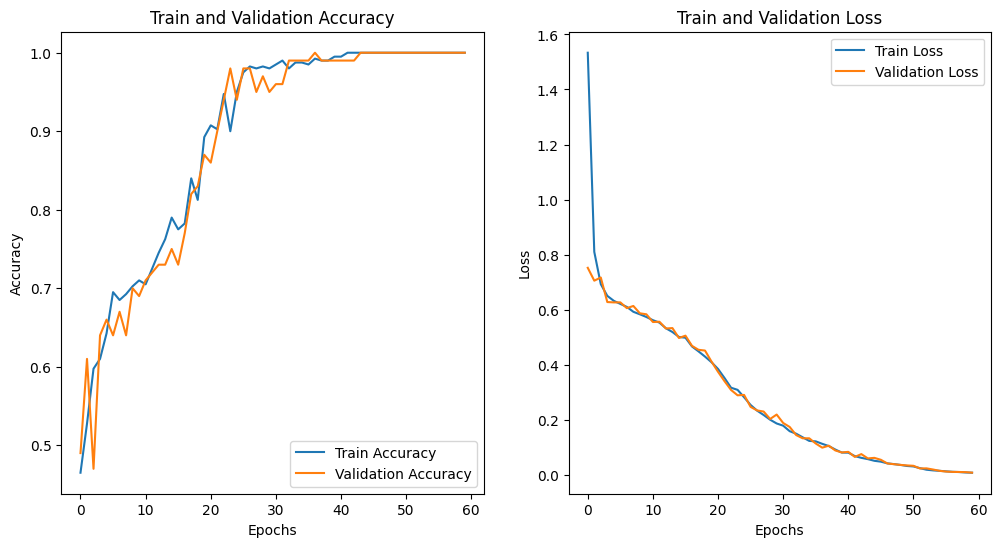

In [17]:
plt.figure(figsize=(12, 6))

# Plot untuk akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

# Plot untuk loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.show()

In [24]:
# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Melakukan prediksi pada data pengujian
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Menampilkan beberapa hasil prediksi
for i in range(10):
    print(f'Actual: {y_test[i]}, Predicted: {y_pred[i][0]}')




4/4 [==============================] - 0s 5ms/step - loss: 0.0077 - acc: 1.0000
Test Loss: 0.0076692779548466206
Test Accuracy: 1.0
4/4 [==============================] - 0s 3ms/step
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0


In [25]:
# Membuat confusion matrix untuk evaluasi lebih lanjut
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[37  0]
 [ 0 63]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [26]:
model.save('model.h5')

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predict data Baru

In [32]:
from keras.models import load_model
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load model yang sudah dilatih
model = load_model('model.h5')

# Data baru untuk prediksi
new_data = pd.DataFrame({
    'Jenis Kelamin': [0, 1, 0, 0],
    'Umur': [21, 18, 22, 19],
    'Jurusan': [1, 3, 4, 1],
    'Tahun Studi': [4, 4, 2, 1],
    'IPK': [4, 3, 4, 2],
    'Sudah Menikah?': [0, 1, 0, 1],
    'Sedang Depresi?': [1, 1, 0, 0],
    'Sedang Cemas?': [1, 0, 0, 0],
    'Sedang Panik?': [0, 1, 0, 0],
    'Sedang Menjalani Perawatan?': [1, 0, 0, 0],
})

# Normalisasi data baru
new_data_normalized = scaler.fit_transform(new_data).astype(int)

# Melakukan prediksi pada data baru
new_pred_prob = model.predict(new_data_normalized)
new_pred = (new_pred_prob > 0.8).astype("int32")

# Tampilkan hasil prediksi
for i in range(len(new_pred)):
    print(f"Data {i+1}: Prediksi={new_pred[i][0]}, Probabilitas Stres={new_pred_prob[i][0]:.4f}")


1/1 [==============================] - 0s 86ms/step
Data 1: Prediksi=1, Probabilitas Stres=0.9991
Data 2: Prediksi=1, Probabilitas Stres=0.9987
Data 3: Prediksi=0, Probabilitas Stres=0.5518
Data 4: Prediksi=0, Probabilitas Stres=0.7101
